In [2]:
#######################################################
# Fetching GDELT data of last n days. n can be passed at runtime during the program execution
# Dataframe of last n days is created and can be dumped using a pickle for future works.

#This Script Visualizes data of last n days all together
#######################################################



import requests
import lxml.html as lh
import os.path
import urllib.request
import zipfile
import glob
import operator
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def fetch_lastndays(n):
    gdelt_base_url = 'http://data.gdeltproject.org/events/'

    # get the list of all the links on the gdelt file page
    page = requests.get(gdelt_base_url + 'index.html')
    doc = lh.fromstring(page.content)
    link_list = doc.xpath("//*/ul/li/a/@href")

    # separate out those links that begin with four digits
    file_list = [x for x in link_list if str.isdigit(x[0:4])]
    local_path = ''
    infilecounter = 0
    outfilecounter = 0
    counter = 0

    for compressed_file in file_list[infilecounter:]:
        if counter < n:  # Pick data of last n days
            # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
            while not os.path.isfile(local_path + compressed_file):
                urllib.request.urlretrieve(url=gdelt_base_url + compressed_file,
                                           filename=local_path + compressed_file)

            # extract the contents of the compressed file to a temporary directory
            print('extracting')
            z = zipfile.ZipFile(file=local_path + compressed_file, mode='r')
            z.extractall(path=local_path + 'tmp/')

            # parse each of the csv files in the working directory,
            for infile_name in glob.glob(local_path + 'tmp/*'):
                outfile_name = local_path + 'summary/' + '%04i.tsv' % outfilecounter

                # open the infile and outfile
                with open(infile_name, mode='r', encoding="utf-8") as infile, open(outfile_name, mode='w',
                                                                                   encoding="utf-8") as outfile:
                    for line in infile:
                        outfile.write(line)
                    outfilecounter += 1

                # delete the temporary file
                os.remove(infile_name)
            infilecounter += 1
            print("done")
            counter += 1

    #colnames = pd.read_excel('CSV.header.fieldids.xlsx',sheetname='Sheet1',index_col='Column ID',parse_cols=1)['Field Name']
    #sheetname='Sheet1' , parse_cols=1
    
    colnames = ['GLOBALEVENTID','SQLDATE','MonthYear','Year','FractionDate','Actor1Code','Actor1Name',
    'Actor1CountryCode','Actor1KnownGroupCode','Actor1EthnicCode','Actor1Religion1Code','Actor1Religion2Code',
    'Actor1Type1Code','Actor1Type2Code','Actor1Type3Code','Actor2Code','Actor2Name','Actor2CountryCode',
    'Actor2KnownGroupCode','Actor2EthnicCode','Actor2Religion1Code','Actor2Religion2Code','Actor2Type1Code',
    'Actor2Type2Code','Actor2Type3Code','IsRootEvent','EventCode','EventBaseCode','EventRootCode','QuadClass',
    'GoldsteinScale','NumMentions','NumSources','NumArticles','AvgTone','Actor1Geo_Type','Actor1Geo_FullName',
    'Actor1Geo_CountryCode','Actor1Geo_ADM1Code','Actor1Geo_ADM','Actor1Geo_Lat','Actor1Geo_Long',
    'Actor1Geo_FeatureID','Actor2Geo_Type','Actor2Geo_FullName','Actor2Geo_CountryCode',
    'Actor2Geo_ADM1Code','Actor1Geo_ADM2','Actor2Geo_Lat','Actor2Geo_Long','Actor2Geo_FeatureID',
    'ActionGeo_Type','ActionGeo_FullName','ActionGeo_CountryCode','ActionGeo_ADM1Code',
    'ActionGeo_ADM2','ActionGeo_Lat','ActionGeo_Long','ActionGeo_FeatureID','DATEADDED','SOURCEURL']
    
    
    # Build DataFrames from each of the intermediary files
    files = glob.glob(local_path + 'summary/' + '*')
    DFlist = []
    for active_file in files:
        DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
                                  names=colnames, index_col=['GLOBALEVENTID']))

    # Merge the file-based dataframes and save a pickle
    DF = pd.concat(DFlist)
    pd.set_option('display.max_columns', None)
    #DF.fillna("0", inplace=True)
    # DF.to_pickle(local_path+'backupoverall'+'.pickle') #Dump the data if required

    # once everything is safely stored away, remove the temporary files
    for active_file in files:
        os.remove(active_file)
        
    for file in file_list:
        try:
            os.remove(file)
        except:
            continue

    return DF


DF = fetch_lastndays(1) # Fetches Data of last n days

# Creating a new dataframe which only has significant features
DF2 = DF[[ 'AvgTone','GoldsteinScale',  'Actor1Code','ActionGeo_Lat','ActionGeo_Long',
    'DATEADDED','ActionGeo_CountryCode','ActionGeo_Type', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code','QuadClass','EventRootCode', 'EventCode']]


DF2['ActionGeo_CountryCode'].fillna("",inplace=True)
DF2['AvgTone']  = pd.to_numeric(DF2['AvgTone'])
DF2['GoldsteinScale'] = pd.to_numeric(DF2['GoldsteinScale'])




extracting
done


C:\Users\karti\Miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\karti\Miniconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\karti\Miniconda3\lib\site-packages\ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [3]:
DF2.head()

,AvgTone,GoldsteinScale,Actor1Code,ActionGeo_Lat,ActionGeo_Long,DATEADDED,ActionGeo_CountryCode,ActionGeo_Type,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,QuadClass,EventRootCode,EventCode
GLOBALEVENTID,,,,,,,,,,,,,,,
907380664,-7.662835,-2.0,CVL,20200221,https://punchng.com/police-feigning-ignorance-...,NaN,5.5,NI,NI36,5.48986,NI,NI36,3,11,1123
907380665,-7.662835,-2.0,CVL,20200221,https://punchng.com/police-feigning-ignorance-...,NaN,5.5,NI,NI36,5.5,NI,NI36,3,11,1123
907380666,-0.240385,0.0,DEU,20200221,https://www.vox.com/2020/2/20/21146141/germany...,NaN,32,IR,NaN,NaN,GM,GM16,1,01,010
907380667,4.745763,7.0,EDU,20200221,https://www.miragenews.com/growing-english-lan...,NaN,-25,AS,AS,-25,AS,AS,2,07,070
907380668,0.800000,0.0,FRA,20200221,https://www.mirror.co.uk/3am/celebrity-news/ku...,NaN,,NaN,NaN,NaN,NaN,NaN,1,01,017


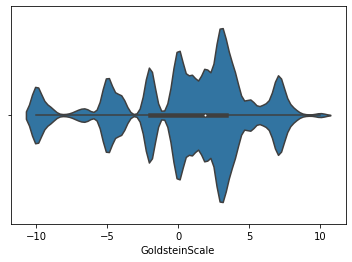

In [7]:
# Plotting Goldstein with respect to dateadded
plt.close('all')
sns.violinplot(x = 'GoldsteinScale', data=DF2)

plt.show()

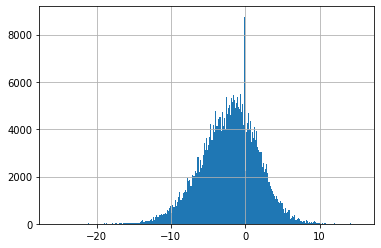

In [8]:
# Plotting Histograms of AvgTone
hist = DF2['AvgTone'].hist(bins=300)

In [11]:
colnames = columns = ['GLOBALEVENTID','SQLDATE','MonthYear','Year','FractionDate','Actor1Code','Actor1Name',
    'Actor1CountryCode','Actor1KnownGroupCode','Actor1EthnicCode','Actor1Religion1Code','Actor1Religion2Code',
    'Actor1Type1Code','Actor1Type2Code','Actor1Type3Code','Actor2Code','Actor2Name','Actor2CountryCode',
    'Actor2KnownGroupCode','Actor2EthnicCode','Actor2Religion1Code','Actor2Religion2Code','Actor2Type1Code',
    'Actor2Type2Code','Actor2Type3Code','IsRootEvent','EventCode','EventBaseCode','EventRootCode','QuadClass',
    'GoldsteinScale','NumMentions','NumSources','NumArticles','AvgTone','Actor1Geo_Type','Actor1Geo_FullName',
    'Actor1Geo_CountryCode','Actor1Geo_ADM1Code','Actor1Geo_ADM','Actor1Geo_Lat','Actor1Geo_Long',
    'Actor1Geo_FeatureID','Actor2Geo_Type','Actor2Geo_FullName','Actor2Geo_CountryCode',
    'Actor2Geo_ADM1Code','Actor1Geo_ADM2','Actor2Geo_Lat','Actor2Geo_Long','Actor2Geo_FeatureID',
    'ActionGeo_Type','ActionGeo_FullName','ActionGeo_CountryCode','ActionGeo_ADM1Code',
    'ActionGeo_ADM2','ActionGeo_Lat','ActionGeo_Long','ActionGeo_FeatureID','DATEADDED','SOURCEURL']

C:\Users\karti\Miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\karti\Miniconda3\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\karti\Miniconda3\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

ValueError: Unable to parse string "--" at position 171193

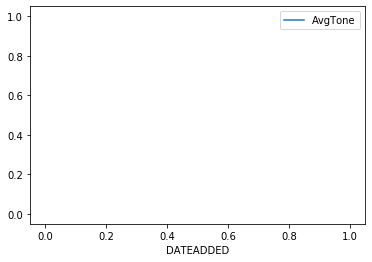

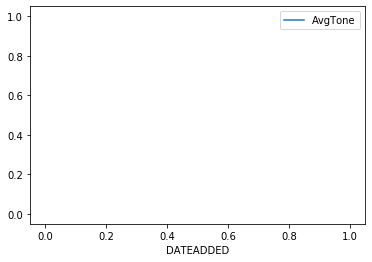

In [12]:
#######################################################
# Fetching GDELT data of each day individually. n can be passed at runtime during the program execution
# Dataframe of each day is created and can be dumped using a pickle for future works.

#This Script Visualizes data of each day from the past n days
#######################################################


import requests
import lxml.html as lh
import os.path
import urllib.request
import zipfile
import glob
import operator
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def fetch_lastdays(n):
    gdelt_base_url = 'http://data.gdeltproject.org/events/'

    # get the list of all the links on the gdelt file page
    page = requests.get(gdelt_base_url + 'index.html')
    doc = lh.fromstring(page.content)
    link_list = doc.xpath("//*/ul/li/a/@href")

    # separate out those links that begin with four digits
    file_list = [x for x in link_list if str.isdigit(x[0:4])]
    local_path = 'C://Semester 4//Project//'
    infilecounter = 0
    outfilecounter = 0
    counter = 0
    
    for compressed_file in file_list[infilecounter:]:
        if counter < n:  # Pick data of last n days
            # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
            while not os.path.isfile(local_path + compressed_file):
                urllib.request.urlretrieve(url=gdelt_base_url + compressed_file,
                                           filename=local_path + compressed_file)

            # extract the contents of the compressed file to a temporary directory
            z = zipfile.ZipFile(file=local_path + compressed_file, mode='r')
            z.extractall(path=local_path + 'tmp/')

            # parse each of the csv files in the working directory,
            for infile_name in glob.glob(local_path + 'tmp/*'):
                outfile_name = local_path + 'summary/' + str(counter) + ".tsv"

                # open the infile and outfile
                with open(infile_name, mode='r', encoding="utf-8") as infile, open(outfile_name, mode='w',
                                                                                   encoding="utf-8") as outfile:
                    for line in infile:
                        outfile.write(line)
                    outfilecounter += 1

                # delete the temporary file
                os.remove(infile_name)

                

                # Build DataFrames from each of the intermediary files
                files = glob.glob(local_path + 'summary/' + '*')
                DFlist = []
                active_file = "C://Semester 4//Project//summary//" + str(counter) + ".tsv"
                DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
                                              names=colnames, index_col=['GLOBALEVENTID']))

                # Merge the file-based dataframes and save a pickle
                DF = pd.concat(DFlist)
                pd.set_option('display.max_columns', None)
                DF2 = DF[['AvgTone', 'GoldsteinScale', 'Actor1Code', 'ActionGeo_Lat', 'ActionGeo_Long',
                          'DATEADDED', 'ActionGeo_CountryCode', 'ActionGeo_Type', 'Actor2Geo_CountryCode',
                          'Actor2Geo_ADM1Code',
                          'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'QuadClass', 'EventRootCode', 'EventCode']]

                DF2['ActionGeo_CountryCode'].fillna("", inplace=True)
                DF2['AvgTone'] = pd.to_numeric(DF2['AvgTone'])
                DF2['GoldsteinScale'] = pd.to_numeric(DF2['GoldsteinScale'])
                DF2['EventRootCode'] = pd.to_numeric(DF2['EventRootCode'])
                DF2.plot(x='DATEADDED', y='AvgTone')
                plt.savefig("avg" + str(counter)+ ".png")
                counter += 1
        infilecounter += 1
    return DF


DF = fetch_lastdays(4)  # Fetches Data of last n days

In [ ]:
##############################################
# Python script to update the table in Amazon Relational Database services.
##############################################

import sched, time
import pymysql

host="database-1.cacx6hipqg1k.us-east-2.rds.amazonaws.com"
port=3306
dbname="database-1"
user="supersoniiq15"
passwd=""

connection = pymysql.connect(host, user=user,port=port,
                           password=passwd, db=dbname)
cursor = connection.cursor()
s = sched.scheduler(time.time, time.sleep)

def do_something(sc): 
    print("Executing")
    df1,df2 = update_every15()
    cols = "`,`".join([str(i) for i in df1.columns.tolist()])
    for i,row in data.iterrows():
        sql = "INSERT INTO 'gdelt' ('" +cols + "') VALUES (" + "%s,"*(len(row)-1) + "%s)"
        cursor.execute(sql, tuple(row))
        
        connection.commit()
    s.enter(60*15, 1, do_something, (sc,))

s.enter(60*15, 1, do_something, (s,))
s.run()